# Numpy -  arrays multidimensionales de datos 

Traducido del inglés, adaptado a las versiones 3.x y ampliado por P. Gzlez. Rodelas (prodelas at ugr.es) a partir de un notebook original de J.R. Johansson (jrjohansson at gmail.com), que se encuentra disponible en http://github.com/jrjohansson/scientific-python-lectures.
Otros notebooks de la misma serie están indexados en el material adicional http://jrjohansson.github.io disponible para el libro [Numerical Python](https://www.apress.com/gp/book/9781484205532#otherversion=9781484205549), de [Apress]().Otros notebooks de la misma serie están indexados en el material adicional http://jrjohansson.github.io disponible para el libro [Numerical Python](https://www.apress.com/gp/book/9781484205532#otherversion=9781484205549), de [Apress](https://www.apress.com/gp?countryChanged=true&msclkid=ace982a936501f8a21aedd2d53522db5).

## Inicializaciones previas y definición de funciones auxiliares

In [1]:
# Definimos ahora cierta función que transformará en cero cualquier valor no superior en valor absoluto a cierto umbral 'eps'
# que nos servirá para intentar corregir o mitigar ciertos pequeños errores de redondeo en las operaciones en coma flotante.
eps = 10**(-15)
def mychop(expr, *, max = eps): 
    if abs(expr) > max:
      return expr 
    else:
      return 0

In [2]:
mychop(10**(-14)),mychop(10**(-15))   # vemos el efecto que tiene en dos cantidades bastante pequeñas

(1e-14, 0)

In [3]:
# sin embargo, esta función definida no se puede aplicar a listas; descomente la siguiente linea por ejemplo
# mychop([10**(-12),10**(-16)])

In [4]:
# Definimos pues ahora otra versión que sí que admite sin problema listas de valores
def choplist(expr, *, max = eps):
    return [s if abs(s) > max else 0 for s in expr]

In [5]:
[10**(-i) for i in range(20)]

[1,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12,
 1e-13,
 1e-14,
 1e-15,
 1e-16,
 1e-17,
 1e-18,
 1e-19]

In [6]:
# y lo probamos con una lista de potencias negativas de 10
choplist([10**(-i) for i in range(20)])

[1,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12,
 1e-13,
 1e-14,
 0,
 0,
 0,
 0,
 0]

In [7]:
eps

1e-15

Sin embargo, a lo largo de este notebook, también veremos otras posibles implementaciones de esta función que también se puedan aplicar sin problema tanto a listas como a los denominados `arrays` de NumPy.

## Introducción

El paquete (o módulo) `numpy` será usado en casi todos los cálculos numéricos con Python. Es un paquete que proporciona la posibilidad de usar vectores de alto rendimiento, matrices y estructuras de datos multidimensionales (arrays) para Python. Está implementado en C y Fortran, de manera que los cálculos pueden ser vectorizados (formulados con vectores y matrices), para mejorar enormemente el rendimiento. 

Para poder usar `numpy` se necesita importar previamente dicho módulo, usando por ejemplo:

In [8]:
from numpy import *

# No obstante, la forma más extendida de cargar este paquete sería:
#  import numpy as np
#  import numpy

En el paquete `numpy` la terminología usada para los vectores, matrices y otros conjuntos de datos multi-dimensionales será la de *array*. 



## Creando arrays con `numpy` 

Hay diferentes maneras de inicializar nuevos arrays en numpy, por ejemplo a partir de

* una lista o tupla de Python
* usando funciones dedicadas a generar arrays en numpy, tales como `arange`, `linspace`, etc.
* leyendo datos a partir de ficheros

### A partir de listas

Por ejemplo, para crear un nuevo vector y una matriz de tipo array como listas en Python podemos usar la función `numpy.array`.

In [9]:
# un vector: el argumento de la función array será una simple lista de Python
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [10]:
# una matriz: el argumento de la función array será en este caso 
# una lista anidada de Python
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

Los objetos `v` y `M` son ambos de tipo `ndarray`, que proporciona el módulo `numpy`.

In [11]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

La diferencia entre los arrays `v` y `M` radica sólo en sus dimensiones ("shapes" en inglés). Podemos obtener información acerca de las dimensiones de un array usando la propiedad `ndarray.shape`.

In [12]:
v.shape

(4,)

In [13]:
M.shape

(2, 2)

Por otra parte, el número de elementos en el array también está disponible gracias a la propiedad `ndarray.size`:

In [14]:
M.size

4

Equivalentemente, también podríamos haber usado las funciones `numpy.shape` y `numpy.size`

In [15]:
shape(M)

(2, 2)

In [16]:
size(M)

4

Hasta el momento cualquier elemento del tipo `numpy.ndarray` tiene todo el aspecto de una lista (simple o anidada) de Python. Entonces, ¿por qué no usar simplemente las listas de Python para todos los cálculos en vez de crear un nuevo tipo de objeto denominado array?

Hay varias razones para ello:

* En primer lugar, las listas de Python son bastante generales. Pueden contener cualquier tipo de objetos, también poseen tipado dinámico, pero el gran inconveniente es que no soportan la acción de funciones matemáticas, como por ejemplo la multiplicación de matrices, producto escalar, etc. Por otro lado, la implementación de tales funciones para las listas de Python no hubiera resultado nada eficiente debido precisamente a este tipado dinámico.
* Contrariamente a esto, los arrays en Numpy están **tipados estáticamente** y son **homogéneos**. Es decir, el tipo de los elementos está determinado cuando el array es creado.
* De esta manera los arrays de Numpy gestionan mucho mejor la memoria.
* Debido al tipado estático, implementaciones bastante rápidas de las funciones matemáticas, como la multiplicación y la suma de arrays de `numpy`  puede realizarse en un lenguaje compilado (C y Fortran).

Usando la propiedad `dtype` (data type) de un `ndarray`, podemos ver que tipo  de datos tiene un array:

In [17]:
M.dtype

dtype('int32')

Obtendremos un error si intentamos asignarle un valor de tipo equivocado a un elemento de un array de numpy:

In [18]:
# Descomente la siguiente linea si quiere comprobarlo
# M[0,0] = "hello"

En los casos en los que se pueda realizar una conversión automática de tipo no obtendremos un error, pero la asignación no se realizará como esperamos.

In [19]:
# Veámos por ejemplo que ocurre si intentamos asignar un valor en coma flotante en un array con elementos de tipo entero
M[0,0] = 4.35
M

array([[4, 2],
       [3, 4]])

Si queremos, también podemos definir explícitamente el tipo de dato de un array cuando lo creamos, usando la palabra `dtype` como argumento: 

In [20]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Tipos de dato comunes que pueden ser usados con `dtype` son: `int`, `float`, `complex`, `bool`, `object`, etc.

También podemos definir explícitamente el tamaño en bits del tipo de dato en cuestión, por ejemplo: `int64`, `int32`, `int16`, `float128`, `complex128`, `float64`, `complex64`, ...

### Usando funciones generadoras de  arrays

Para arrays más grandes sería poco práctico inicializar sus elementos manualmente, usando listas explícitas de python. En vez de esto podemos usar alguna de las muchas funciones en `numpy` que permiten generar arrays de diferentes formas. Algunas de las más comunes son:

#### arange

In [21]:
# crea una lista con valores en un determinado rango

x = arange(0, 10, 1) # argumentos: inicio, fin, paso

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
# Nótese que siempre el último elemento toma el valor 'fin - paso'

In [23]:
x = arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### Las órdenes 'linspace' y 'logspace'

In [24]:
# Usando 'linspace' ambos valores extremos SI QUE SON INCLUIDOS
# y además tenemos control sobre el número exacto de valores en el array
linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [25]:
# Con la orden 'logspace' se realiza una representación de tipo logarítmica
logspace(0, 10, 5, base=e)

array([1.00000000e+00, 1.21824940e+01, 1.48413159e+02, 1.80804241e+03,
       2.20264658e+04])

In [26]:
# equivalente a la siguiente sucesión de órdenes en Python 2
array(list(map(lambda x: e**x, linspace(0, 10, 5))))

array([1.00000000e+00, 1.21824940e+01, 1.48413159e+02, 1.80804241e+03,
       2.20264658e+04])

#### Arrays bidimensionales con 'mgrid'

In [27]:
x, y = mgrid[0:5, 0:5] # similar al comando meshgrid en MATLAB

In [28]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [29]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### datos aleatorios

In [30]:
from numpy import random

In [31]:
#  array de tamaño 5 por 5 de números aleatorios uniformemente distribuidos en [0,1]
random.rand(5,5)

array([[0.40499582, 0.10687907, 0.70708619, 0.84820244, 0.11475966],
       [0.19601107, 0.78653044, 0.14543306, 0.45149233, 0.49877115],
       [0.43311166, 0.97866918, 0.05202562, 0.41522106, 0.76753021],
       [0.64474864, 0.18545757, 0.07097291, 0.78915312, 0.89049169],
       [0.30744113, 0.71376749, 0.30194137, 0.50813551, 0.18642776]])

In [32]:
# array de tamaño 5 por 5 de números aleatorios distribuidos según una normal estándar
random.randn(5,5)

array([[ 1.74861816e-01,  2.26201131e+00,  1.04263079e+00,
         8.38439742e-01, -3.02003792e-01],
       [-7.86529756e-01,  1.90595391e-01,  1.15530833e+00,
         4.82717235e-01, -1.36752157e+00],
       [-8.91950827e-01,  2.22640944e-01, -9.10179467e-01,
        -3.27286140e-01,  4.17694162e-02],
       [-5.38599718e-01,  2.15788595e-01,  4.12812531e-01,
        -1.67071710e+00,  4.61414444e-01],
       [-6.29048941e-01, -6.82948355e-01,  1.30638614e+00,
         6.47790280e-01, -1.47821483e-03]])

In [33]:
M = random.rand(3,3)

M

array([[0.78624139, 0.74481331, 0.99270168],
       [0.22371029, 0.12494363, 0.71715947],
       [0.65936183, 0.06245642, 0.33639299]])

#### Matrices diagonales con la orden 'diag'

In [34]:
# una matriz (array bidimensional) diagonal
# con valores predeterminados en la diagonal principal
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [35]:
# ahora con valores predeterminados en una diagonal por encima de la diagonal principal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### arrays (bidimensionales o no)  con ceros y unos

In [36]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
zeros((3,3,3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [38]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Más propiedades de los arrays de numpy 

In [39]:
M

array([[0.78624139, 0.74481331, 0.99270168],
       [0.22371029, 0.12494363, 0.71715947],
       [0.65936183, 0.06245642, 0.33639299]])

In [40]:
M.itemsize # bytes por elemento

8

In [41]:
M.nbytes # número total de bytes

72

In [42]:
M.ndim # número de dimensiones

2

## Manipulando arrays

### Indexado

Podemos indexar elementos en un array usando corchetes y los correspondientes índices (¡recordar que el primer índice siempre será 0!):

In [43]:
v

array([1, 2, 3, 4])

In [44]:
#  como v es un vector, tiene una sola dimensión, y podrá usarse un sólo índice
v[0], v[1]

(1, 2)

In [45]:
# M sin embargo es una matriz, o array bidimensional, con dos índices 
M[0,0], M[1,2]

(0.7862413877988144, 0.7171594704063429)

In [46]:
M

array([[0.78624139, 0.74481331, 0.99270168],
       [0.22371029, 0.12494363, 0.71715947],
       [0.65936183, 0.06245642, 0.33639299]])

In [47]:
# Si omitimos uno de los índices de un array multidimensional 
# obtendremos la fila completa (o en general, un array N-1 dimensional
M[0]

array([0.78624139, 0.74481331, 0.99270168])

Lo mismo se podría obtener usando los dos puntos, `:` en vez de un índice: 

In [48]:
M[0,:] # fila con índice 0 (en realidad es la primera fila)

array([0.78624139, 0.74481331, 0.99270168])

In [49]:
M[1,:] # fila con índice 1 (en realidad es la segunda fila)

array([0.22371029, 0.12494363, 0.71715947])

In [50]:
M[:,0] # columna con índice 0 (primera columna)

array([0.78624139, 0.22371029, 0.65936183])

In [51]:
M[:,1] # columna con índice 1 (segunda)

array([0.74481331, 0.12494363, 0.06245642])

Podemos asignar nuevos valores a elementos en un array usando los índices adecuados:

In [52]:
M[0,0] = 1

In [53]:
M

array([[1.        , 0.74481331, 0.99270168],
       [0.22371029, 0.12494363, 0.71715947],
       [0.65936183, 0.06245642, 0.33639299]])

In [54]:
# también funciona con filas o columnas completas
M[1,:] = 0
M[:,2] = -1

In [55]:
M

array([[ 1.        ,  0.74481331, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.65936183,  0.06245642, -1.        ]])

### Índices rebanados ("Index slicing")

Este sería el nombre técnico para la sintaxis `M[inferior:superior:paso]` para extraer parte de un array:

In [56]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [57]:
A[1:3]

array([2, 3])

Estas rebanadas de array son *mutables*: es decir, se les puede asignar valores diferentes a los originales, modificando así el array en sí:

In [58]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

De hecho podríamos omitir cualquiera de los tres parámetros en `M[inferior:superior:paso]`:

In [59]:
A[::] 
# Aquí inferior, superior y paso toman todos el valor que permite recuperar A 

array([ 1, -2, -3,  4,  5])

In [60]:
A[::2] #  Aquí el paso es 2, 
# mientras que inferior y superior siguen tomando los valores que tenían de antemano

array([ 1, -3,  5])

In [61]:
A[:3] # Aquí se mostrarán los tres primeros elementos

array([ 1, -2, -3])

In [62]:
A[3:] # Aquí los elementos a partir del índice 3 (es decir el 4 y el 5)

array([4, 5])

Los índices negativos cuentan desde el final del array (los positivos desde el principio):

In [63]:
A = array([1,2,3,4,5])

In [64]:
A[-1] # Indica el último elemento del array

5

In [65]:
A[-3:] # Indica los 3 últimos elementos

array([3, 4, 5])

Esta técnica funciona exactamente igual para arrays multidimensionales:

In [66]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [67]:
# Extraemos un bloque del array original
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [68]:
# "a zancadas" ("strides" en inglés)
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Indexado de lujo o personalizado ("Fancy  indexing" en inglés) 

Este suele ser el término empleado cuando otro array o lista es usada en lugar de un índice normal: 

In [69]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [70]:
indices_fila = [1, 2, 3]
A[indices_fila]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [71]:
indices_columna = [1, 2, -1] 
# recuérdese que el índice -1 hace referencia al último elemento

In [72]:
# Ahora entresacaremos las columnas indicadas por indices_columna
A[:, indices_columna]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

In [73]:
# Finalmente entresacaremos los elementos de la matriz indicados por la combinación de
# los índices fila y columna combinados en indices_fila e dindices_columna.
A[indices_fila, indices_columna]

array([11, 22, 34])

Incluso podemos usar índices máscara de manera que si este índice máscara en un array de Numpy de tipo `bool`, entonces un elemento será seleccionado (True) o no (False), dependiendo del valor del índice máscara en la posición de cada elemento: 

In [74]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [75]:
mascara_fila = array([True, False, True, False, False])
B[mascara_fila]

array([0, 2])

In [76]:
# otra forma de hacer lo mismo
mascara_fila = array([1,0,1,0,0], dtype=bool)
B[mascara_fila]

array([0, 2])

Esta característica es muy útil para poder seleccionar condicionalmente elementos de un array, usando por ejemplo operadores de comparación:

In [77]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [78]:
# Descomente la siguiente linea si quiere comprobar qué ocurre si intentamos imponer dos condiciones de tipo lógico a la vez
# 5 < x < 7.5
# Python no admite esta forma de condiciones combinadas, por lo que tendremos que optar por
# otra estrategia, como se verá a continuación:

In [79]:
5 < x    # una cada vez sí que es posile

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [80]:
x < 7.5  # una cada vez sí que es posile

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [81]:
# Descomente la siguiente linea si quiere comprobar qué ocurre si lo intentamos ahora de otra manera
# 5 < x and x < 7.5
# De momento este planteamiento tampoco es el adecuado.

In [82]:
# Esta sería finalmente la forma adecuada, aunque estaríamos haciendo uso de la conversión automática de tipos
# entre los valores booleanos 'False' y 'True', que se convierten automáticamente en 0 y 1 respectivamente

mascara = (5 < x) * (x < 7.5)     # con lo cual ya se podrían multiplicar sin ningún problema, elemento a elemento

mascara                           # y luego los resultados volver a ser interpretarse como valores booleanos de nuevo.

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [83]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [84]:
x[mascara]

array([5.5, 6. , 6.5, 7. ])

## Funciones para extraer datos a partir de arrays y para crear nuevos arrays

### where

Los índices máscara pueden convertirse en índices de posición usando la función `where`

In [85]:
indices = where(mascara)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [86]:
x[indices] # esta indexación es equivalente al indexado x[mask]

array([5.5, 6. , 6.5, 7. ])

In [87]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

### diag

Con la función `diag` también podemos extraer la diagonal y subdiagonales de un array:

In [88]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [89]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [90]:
diag(A, -1)

array([10, 21, 32, 43])

In [91]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [92]:
diag(A, 1)

array([ 1, 12, 23, 34])

### take

La función `take` es similar al indexado descrito más arriba:

In [93]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [94]:
indices = [1, 3, 5]
v2[indices] #  indexado personalizado

array([-2,  0,  2])

In [95]:
v2.take(indices)

array([-2,  0,  2])

Pero `take` también funciona con listas y otros objetos:

In [96]:
take([-3, -2, -1,  0,  1,  2], indices)

array([-2,  0,  2])

### choose

Construye un array tomando elementos de varios arrays:

In [97]:
cual = [1, 0, 1, 0]
opciones = [[-2,-2,-2,-2], [5,5,5,5]]

choose(cual, opciones)

array([ 5, -2,  5, -2])

In [98]:
cual = [1, 0, 1, 0]
opciones = [[-1,-2,-3,-4], [1,2,3,4]]

choose(cual, opciones)

array([ 1, -2,  3, -4])

# Operaciones elemento a elemento y de tipo matricial

La vectorización de código es una de las claves para escribir programas de cálculo numérico eficientes con Python/Numpy. Esto quiere decir que en la medida de lo posible, un programa debería de formularse en términos de operaciones con arrays, o bien con matrices y vectores, como una multiplicación matriz-matriz o matriz-vector del Algebra matricial, por ejemplo.

Otra característica interesante de `numpy` es la capacidad de "propagación" (o **broadcasting** en inglés), que asegura la posibilidad de realizar ciertas operaciones habituales (como la suma o la resta, por ejemplo) entre **arrays** que, aunque no tengan exactamente las mismas dimensiones, sí que resultan compatibles de alguna manera, si suponemos una adecuada extensión de alguno de ellos mediante copias apiladas de sus elementos; véase la siguiente imagen ilustrativa: 

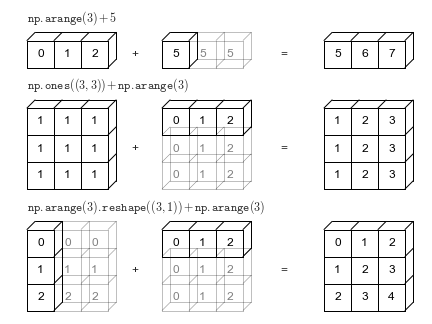

### Operaciones de tipo escalar-array 

Podemos usar los operadores aritméticos usuales: suma, resta, multiplicación y de división de un array entre cualqier número escalar adecuado (no cero, en caso de estar dividiendo).

In [99]:
v1 = arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [100]:
v1 * 2

array([0, 2, 4, 6, 8])

In [101]:
v1 + 2     # aquí se hace uso de las propiedades de "broadcasting" de los arrays de NumPy (ver más arriba)

array([2, 3, 4, 5, 6])

In [102]:
A = array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [103]:
A

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [104]:
A * 2

array([[  0,   4,   8,  12,  16],
       [ 40,  44,  48,  52,  56],
       [ 80,  84,  88,  92,  96],
       [120, 124, 128, 132, 136],
       [160, 164, 168, 172, 176]])

Nótese que el resultado de la operación tiene lugar con todos los elementos del array.

In [105]:
A + 2    # aquí se hace uso de las propiedades de "broadcasting"

array([[ 2,  4,  6,  8, 10],
       [22, 24, 26, 28, 30],
       [42, 44, 46, 48, 50],
       [62, 64, 66, 68, 70],
       [82, 84, 86, 88, 90]])

###  Operaciones de tipo array-array, elemento a elemento

Podemos sumar, substraer, multiplicar y dividir arrays entre ellos, siendo la operación **elemento a elemento** el comportamiento por defecto:

In [106]:
A * A # multiplicación elemento a elemento

array([[   0,    4,   16,   36,   64],
       [ 400,  484,  576,  676,  784],
       [1600, 1764, 1936, 2116, 2304],
       [3600, 3844, 4096, 4356, 4624],
       [6400, 6724, 7056, 7396, 7744]])

In [107]:
v1

array([0, 1, 2, 3, 4])

In [108]:
v1 * v1

array([ 0,  1,  4,  9, 16])

También si multiplicamos arrays con dimensiones compatibles, obtendremos multiplicaciones elemento a elemento de cada una de las filas:

In [109]:
A.shape, v1.shape

((5, 5), (5,))

In [110]:
A * v1

array([[  0,   2,   8,  18,  32],
       [  0,  22,  48,  78, 112],
       [  0,  42,  88, 138, 192],
       [  0,  62, 128, 198, 272],
       [  0,  82, 168, 258, 352]])

In [111]:
A

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [112]:
v1

array([0, 1, 2, 3, 4])

### Álgebra matricial

¿Cómo efectuar pues la multiplicación matricial? Hay dos maneras de hacerlo: usando la función `dot`, que permite aplicar una multiplicación de tipo matriz-matriz, matriz-vector o bien un producto escalar entre dos vectores:

In [113]:
dot(A, A)

array([[ 1200,  1240,  1280,  1320,  1360],
       [ 5200,  5440,  5680,  5920,  6160],
       [ 9200,  9640, 10080, 10520, 10960],
       [13200, 13840, 14480, 15120, 15760],
       [17200, 18040, 18880, 19720, 20560]])

In [114]:
dot(A, v1)

array([ 60, 260, 460, 660, 860])

In [115]:
dot(v1, v1) # esto sería equivalente a realizar el producto escalar del vector consigo mismo

30

A partir de la versión 3.5 de Python también se introduce el operador `@` para poder multiplicar directamente dos arrays, como si de matrices se tratase, sin necesidad de usar la orden `dot` ni convertirlos previamente a la clase de objetos `matrix`.

In [116]:
# Veámos algún que otro ejemplo
A = random.rand(4,4)
B = identity(4)*5

print(A)
print(B)

print(A@B)
print(A@B-dot(A,B))

[[0.07283501 0.88429063 0.42260083 0.33612868]
 [0.8023237  0.48232804 0.54076471 0.0778598 ]
 [0.19322889 0.86642911 0.02804732 0.96352134]
 [0.5479337  0.45404934 0.92275272 0.28551807]]
[[5. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 5. 0.]
 [0. 0. 0. 5.]]
[[0.36417504 4.42145314 2.11300413 1.68064341]
 [4.01161849 2.41164022 2.70382357 0.38929899]
 [0.96614443 4.33214553 0.14023658 4.81760672]
 [2.73966852 2.2702467  4.61376358 1.42759034]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Alternativamente, podemos convertir un objeto array al tipo de datos `matrix`. Esta es una clase especial que cambia el comportamiento de los operadores aritméticos `+, -, *` para que usen el álgebra matricial usual.

In [117]:
M = matrix(A)
v = matrix(v1).T # esto hace de este array unidimensional un vector columna 

In [118]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [119]:
M * M

matrix([[0.98062719, 1.00969815, 0.83098978, 0.59648835],
        [0.59257384, 1.44601415, 0.68690098, 0.85050669],
        [1.2425958 , 1.05056079, 1.44007156, 0.43453671],
        [0.73895075, 1.63267247, 0.76643441, 1.19014093]])

In [120]:
A*A

array([[5.30493847e-03, 7.81969915e-01, 1.78591458e-01, 1.12982491e-01],
       [6.43723316e-01, 2.32640343e-01, 2.92426475e-01, 6.06214800e-03],
       [3.73374026e-02, 7.50699397e-01, 7.86651959e-04, 9.28373381e-01],
       [3.00231345e-01, 2.06160802e-01, 8.51472576e-01, 8.15205673e-02]])

In [121]:
dot(A,A)

array([[0.98062719, 1.00969815, 0.83098978, 0.59648835],
       [0.59257384, 1.44601415, 0.68690098, 0.85050669],
       [1.2425958 , 1.05056079, 1.44007156, 0.43453671],
       [0.73895075, 1.63267247, 0.76643441, 1.19014093]])

Sin embargo, como podremos comprobar facilmente, cuando las dimensiones de las matrices no sean las adecuadas para la operación que queramos efectuar, evidentemente no podremos realizar dicha operación y obtendremos un mensaje de error.

In [122]:
shape(M), shape(v)    # en este caso vemos que la matriz M es 4x4 mientras que v es un vector de 5 componentes

((4, 4), (5, 1))

In [123]:
# y evidentemente no podremos ni sumarlos o restarlos, ni tampoco realizar la multiplicación matriz vector, ni la división
# M * v
# M + v
# M - v
# M/v
# bastaría con descomentar cualquiera de estas lineas anteriores para ver que obtenemos un error

In [124]:
# Sin embargo una forma de calcular el producto escalar totalmente compatible, y equivalente a  'dot(v1, v1)'
(v.T * v)[0,0]   # sería esta, ya que al trasponer el vector y multiplicarlo por sí mismo obtendríamos un producto matricial


30

In [125]:
#  (recuerde que v1 es el equivalente a v de la clase de objetos 'list').
dot(v1,v1)

30

In [126]:
# con estos objetos de tipo matrix se aplicará el álgebra matricial usual 
# v + M*v

Con este tipo de objetos, si intentamos sumar, sustraer o multiplicar objetos de dimensiones incompatibles obtendremos un error:

In [127]:
v = matrix([1,2,3,4,5,6]).T     # da lugar a la matriz traspuesta

In [128]:
v

matrix([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [129]:
shape(M), shape(v)

((4, 4), (6, 1))

In [130]:
# La siguiente operación tampoco no se podría hacer por ejemplo, al no ser compatibles las dimensiones de ambos
# M * v       # descomente el principio de esta linea si quiere comprobarlo

Ver también las funciones relacionadas: `inner`, `outer`, `cross`, `kron`, `tensordot`.

In [131]:
help(inner)

Help on function inner in module numpy:

inner(...)
    inner(a, b)
    
    Inner product of two arrays.
    
    Ordinary inner product of vectors for 1-D arrays (without complex
    conjugation), in higher dimensions a sum product over the last axes.
    
    Parameters
    ----------
    a, b : array_like
        If `a` and `b` are nonscalar, their last dimensions must match.
    
    Returns
    -------
    out : ndarray
        `out.shape = a.shape[:-1] + b.shape[:-1]`
    
    Raises
    ------
    ValueError
        If the last dimension of `a` and `b` has different size.
    
    See Also
    --------
    tensordot : Sum products over arbitrary axes.
    dot : Generalised matrix product, using second last dimension of `b`.
    einsum : Einstein summation convention.
    
    Notes
    -----
    For vectors (1-D arrays) it computes the ordinary inner-product::
    
        np.inner(a, b) = sum(a[:]*b[:])
    
    More generally, if `ndim(a) = r > 0` and `ndim(b) = s > 0`::
    

In [132]:
a = array([1,1])
b = array([2,3]);

In [133]:
# aquí se está realizando el producto escalar de ambos arrays, como vectores unidimensionales que son
inner(a,b), inner(b,a)                     # comprobamos también la conmutatividad de dicha operación

(5, 5)

In [134]:
a = arange(24).reshape((2,3,4))   # nótese que se trata en realidad de un array tridimensional
b = arange(4)                     # este no deja de ser un array unidimensional 
a,b                               # pero lo importante es que coinciden en el tamaño de la última dimensión de cada uno de ellos

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 array([0, 1, 2, 3]))

In [135]:
inner(a, b)     # y esta sería la única condición para poder efectuar el correspondientes producto interno de ambos

array([[ 14,  38,  62],
       [ 86, 110, 134]])

In [136]:
shape(a),shape((b))

((2, 3, 4), (4,))

### Transformaciones de tipo Array/Matrix

Más arriba hemos usado el operador `.T` que transpone el objeto matriz o vector `v`, aunque también podemos usar la función `transpose` para obtener el mismo resultado. 

Otras funciones matemáticas que se pueden aplicar para transformar de alguna manera un objeto de tipo matrix son las que se exponen en los siguientes ejemplos:

In [137]:
C = matrix([[1j, 2j], [3j, 4j]])    # en este caso estaríamos definiendo una matriz cuadrada con entradas de tipo complejo
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [138]:
conjugate(C)                        # y así obtendríamos otra matriz formado por los conjugados 

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Conjugada Hermitiana: transpuesta conjugada

In [139]:
C.H                                # sin embargo aquí lo que se obtiene es la matriz conjugada traspuesta 

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Por otro lado también podemos extraer la parte real o imaginaria de un array o matriz compleja usando las funciones habituales `real` e `imag`:

In [140]:
real(C) # lo mismo que con: C.real aquí obtendríamos las partes reales de cada entrada de la matriz

matrix([[0., 0.],
        [0., 0.]])

In [141]:
imag(C) # lo mismo que con: C.imag  y aquí obtendríamos las partes imaginarias de cada entrada de la matriz

matrix([[1., 2.],
        [3., 4.]])

De manera análoga obtendríamos el módulo y el argumento complejo

In [142]:
angle(C+1) # Nota para usuarios de MATLAB:
# ¡Atención! nótese que se está usando 'angle' en lugar de 'arg' para obtener los argumentos

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [143]:
abs(C)     # y así estaríamos obteniendo los módulos de dichos números complejos, 
# que en el caso de que fueran números reales coincidiría con los correspondientes valores absolutos

matrix([[1., 2.],
        [3., 4.]])

### Cálculos matriciales

#### Inversa

In [144]:
linalg.inv(C) # equivalente a C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [145]:
C.I     # así también se puede obtener la inversa de la matriz C

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [146]:
linalg.inv(C)*C

matrix([[ 1.00000000e+00+0.j,  8.88178420e-16+0.j],
        [-5.55111512e-17+0.j,  1.00000000e+00+0.j]])

In [147]:
# para comprobar que se obtiene la correspondiente matriz identidad de orden 2, le restamos esta matriz 'eye(2)'
linalg.inv(C)*C - eye(2)    # al producto de la matriz C por su inversa 'inv(C)' y debería de salir la matriz nula
# aunque los pequeños errores de redondeo al trabajar en coma flotante hacen que difiera ligeramente de esta

matrix([[ 4.44089210e-16+0.j,  8.88178420e-16+0.j],
        [-5.55111512e-17+0.j, -2.22044605e-16+0.j]])

In [148]:
choplist(array(_).flatten())    # esto permite realizar la comprobacion final, convirtiendo la matriz 2x2 resultante 
#  en una lista unidimensional, a la que le aplicaremos la función 'choplist' definida al principio del notebook

[0, 0, 0, 0]

In [149]:
C.I * C   -eye(2)    # aquí haremos exactamente lo mismo que antes

matrix([[ 4.44089210e-16+0.j,  8.88178420e-16+0.j],
        [-5.55111512e-17+0.j, -2.22044605e-16+0.j]])

In [150]:
choplist(array(_).flatten(), max = 10**(-14) )   # y lo podemos comprobar también con distintos valores para el umbral máximo

[0, 0, 0, 0]

#### Determinante

In [151]:
linalg.det(C)     # aquí calculamos el determinante de la matriz C

(2.0000000000000004+0j)

In [152]:
linalg.det(C.I)    # y aquí el de su inversa, que vemos que salvo pequeños errores de redondeo es el inverso del anterior

(0.5+0j)

In [153]:
# De manera que el producto de ambos debería de dar el valor 1
linalg.det(C)*linalg.det(C.I)

(1.0000000000000002+0j)

In [154]:
# Para comprobar fehacientemente que se trata simplemente de un pequeño error de redondeo al trabajar en coma flotante haremos
mychop(linalg.det(C)*linalg.det(C.I)-1, max = 10**(-14))  # probando con valores del umbral máximo suficientemente pequeños

0

###  Formato de fichero nativo de Numpy

Útil fundamentalmente cuando guardamos y leemos numerosos datos de tipo array con numpy. Usar para ello las funciones `numpy.save` y `numpy.load`, respectivamente:

In [155]:
M

matrix([[0.07283501, 0.88429063, 0.42260083, 0.33612868],
        [0.8023237 , 0.48232804, 0.54076471, 0.0778598 ],
        [0.19322889, 0.86642911, 0.02804732, 0.96352134],
        [0.5479337 , 0.45404934, 0.92275272, 0.28551807]])

In [156]:
save("matriz-aleatoria.npy", M)

# %%file matriz-aleatoria.npy

In [157]:
%ls *.npy

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8AEE-E6FD

 Directorio de C:\Users\Usuario\Downloads\NumPy\NumPy

16/10/2020  15:04               256 matriz-aleatoria.npy
15/10/2020  22:24               144 matriz-M.npy
09/10/2020  00:53               200 random-matrix.npy
               3 archivos            600 bytes
               0 dirs  282.584.059.904 bytes libres


In [158]:
load("matriz-aleatoria.npy")

array([[0.07283501, 0.88429063, 0.42260083, 0.33612868],
       [0.8023237 , 0.48232804, 0.54076471, 0.0778598 ],
       [0.19322889, 0.86642911, 0.02804732, 0.96352134],
       [0.5479337 , 0.45404934, 0.92275272, 0.28551807]])

In [159]:
savetxt("matriz-aleatoria-bis.csv", M, fmt='%.5f') 
# fmt especifica el formato, en este caso coma flotante con 5 decimales

!type "matriz-aleatoria-bis.csv"  
# este comando es el adecuado para sistemas Windows (usar más bien el comando "!cat" en sistemas tipo Unix)


0.07284 0.88429 0.42260 0.33613
0.80232 0.48233 0.54076 0.07786
0.19323 0.86643 0.02805 0.96352
0.54793 0.45405 0.92275 0.28552


A menudo puede resultar útil almacenar nuestros datos en arrays de Numpy, ya que este paquete proporciona numerosas funciones para realizar calculos estadísticos con conjuntos de datos en arrays. 

Por ejemplo, calculemos ciertas estadísticas del conjunto de datos usado anteriormente acerca de mediciones de temperatura en la ciudad de Estocolmo.

In [160]:
%ls  *.csv

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8AEE-E6FD

 Directorio de C:\Users\Usuario\Downloads\NumPy\NumPy

16/10/2020  12:58        13.685.422 datos.csv
16/10/2020  01:49               102 matriz-aleatoria.csv
16/10/2020  15:04               132 matriz-aleatoria-bis.csv
09/10/2020  00:53                72 random-matrix.csv
               4 archivos     13.685.728 bytes
               0 dirs  282.584.059.904 bytes libres


In [161]:
# recordemos que los datos de temperatura están almacenados 
# en la variable data:
shape(M)

(4, 4)

In [162]:
M

matrix([[0.07283501, 0.88429063, 0.42260083, 0.33612868],
        [0.8023237 , 0.48232804, 0.54076471, 0.0778598 ],
        [0.19322889, 0.86642911, 0.02804732, 0.96352134],
        [0.5479337 , 0.45404934, 0.92275272, 0.28551807]])

#### Media (`mean`)

In [163]:
# calculemos la media de la segunda columna
mean(M[:,1]) # recuerde que la primera columna tiene el índice 0

0.6717742795731514

In [164]:
# Y lo mismo podríamos haber hecho por filas
mean(M[1,:]) # recuerde que la primera filaa tiene el índice 0

0.4758190631558188

#### Desviación estándar ('standard deviation') y varianza ('variance')

In [165]:
std(M[:,1]), var(M[:,1])

(0.20392874094644287, 0.04158693138400141)

#### Mínimos y máximos (`min` y `max`)

In [166]:
# valor mínimo de la segunda columna
M[:,0].min()

0.07283500852639058

In [167]:
# valor máximo de la segunda columna
M[:,2].max()

0.9227527163347998

#### Sumatorias ('sum'), productos ('prod'), y trazas ('trace')

In [168]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [169]:
# sumar todos los elementos
sum(d)

45

In [170]:
d+1   # aprovechando las propiedades de "broadcasting" de los arrays

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [171]:
# factorial de 10
prod(d), prod(d+1)

(0, 3628800)

In [172]:
# suma acumulativa 
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [173]:
# producto acumulativo
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800], dtype=int32)

In [174]:
# Traza de una matriz
trace(A)

0.8687284379679235

In [175]:
# lo mismo que: diag(A).sum()
diag(A).sum()

0.8687284379679235

### Cálculos con datos multi-dimensionales

Cuando funciones como `min`, `max`, etc. se aplican a arrays multidimensionales, a veces resultará útil aplicar dicho cálculo al array completo, pero en otras ocasiones sólo lo necesitaremos hacer fila a fila o bien columna a columna. Usando el argumento `axis` podremos especificar explícitamente cómo deben de actuar dichas funciones vectoriales: 

In [176]:
m = random.rand(3,3)
m

array([[0.99569501, 0.35780532, 0.31336958],
       [0.95961175, 0.45063308, 0.93392901],
       [0.95862641, 0.10684957, 0.53371993]])

In [177]:
# máximo global
m.max()

0.9956950146164406

In [178]:
# máximos en cada columna
m.max(axis=0)

array([0.99569501, 0.45063308, 0.93392901])

In [179]:
# máximos en cada fila
m.max(axis=1)

array([0.99569501, 0.95961175, 0.95862641])

Muchas otras funciones y métodos en las clases `array` y `matrix` también aceptan la misma palabra clave (por supuesto opcional) `axis` como argumento.

# Remodelado, redimensionamiento y apilado de arrays

## Asignación y 'copy' (o "deep copy")

Con el objeto de alcanzar el máximo rendimiento, algunas asignaciones en Python usualmente no realizan copias de los datos y objectos involucrados. Esto es importante por ejemplo cuando éstos son pasados o intercambiados entre funciones, con el objedo de evitar un excesivo uso de copiados innecesarios de posiciones de memoria (tecnicamente el término apropiado sería "paso por referencia") y concretamente esto es especialmente útil cuando trabajamos con listas o arrays de grandes dimensiones, con el consecuente ahorro de memoria y de tiempo de cálculo. 

In [180]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [181]:
# ahora B está haciendo referencia al mismo array de datos que A 
B = A 

In [182]:
# de manera que los cambios realizados en B afectarán a A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [183]:
A

array([[10,  2],
       [ 3,  4]])

Así pues, si nosotros quisiéramos evitar esto, de forma que obtegamo un nuevo objeto completamente independendiente `B` que sea una copia obtenida a partir de `A`, entonces necesitaremos realizar lo que se denomina una "copia profunda" ("deep copy" en inglés) usando la función `copy` en vez de realizar una simple asignación:

In [184]:
B = copy(A)

In [185]:
# ahora, si modificamos B, A no se verá afectada
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [186]:
A

array([[10,  2],
       [ 3,  4]])

Las dimensiones ('shape') de un  array de Numpy pueden ser modificadas sin necesidad de volver a copiar o almacenar de nuevo los datos que contiene, lo cuál hace que la operación resultante sea muy eficiente y rápida, sobre todo para grandes arrays.

In [187]:
# Vamos a generar por ejemplo un array bidimensional a partir de sendas listas por comprensión anidadas 
A = array([[i*10+j for j in range(3)] for i in range(5)])  # con el índice 'i' para las filas y el 'j' para las columnas 
# de manera que las decenas vayan aumentando una unidad en cada fila, mientras que las unidades en cada columna
A  # como podemos comprobar fácilmente

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32],
       [40, 41, 42]])

In [188]:
m, n = A.shape   # con la orden 'shape' podremos extraer ahora el número de filas y de columnas de dicho array
print(m, n)

5 3


In [189]:
B = A.reshape((1,m*n))   # si hacemos ahora una copia simple del array pero realizando un redimensionamiento 
B                        # vemos que podemos extraer una 'vista' unidimensional del mismo.

array([[ 0,  1,  2, 10, 11, 12, 20, 21, 22, 30, 31, 32, 40, 41, 42]])

In [190]:
B[0]   # que incluirá todos los elementos en la posición 0

array([ 0,  1,  2, 10, 11, 12, 20, 21, 22, 30, 31, 32, 40, 41, 42])

In [191]:
B[0,0:n], B[0][0:n]  # de estas dos formas podríamos obtener la primera fila del array original A

(array([0, 1, 2]), array([0, 1, 2]))

In [192]:
B[0,0:n] = -1 # y así modificamos una parte de este array, los que correspondían a la primera fila del array A

B

array([[-1, -1, -1, 10, 11, 12, 20, 21, 22, 30, 31, 32, 40, 41, 42]])

In [193]:
A # Pero nótese que la variable que almacenaba el array original también se ha modificado.
# Es decir, B tan sólo es una vista diferente de los mismos datos del array que se almacenaba en la variable A.

array([[-1, -1, -1],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32],
       [40, 41, 42]])

También podríamos haber usado la función `flatten` para transformar cualquier array multi-dimensional en un vector. Pero en este último caso, en vez de una vista diferente, también se crea una copia distinta de dichos datos.

In [194]:
B = A.flatten()

B

array([-1, -1, -1, 10, 11, 12, 20, 21, 22, 30, 31, 32, 40, 41, 42])

In [195]:
B[0:n] = -10

B

array([-10, -10, -10,  10,  11,  12,  20,  21,  22,  30,  31,  32,  40,
        41,  42])

In [196]:
A # A no ha cambiado en esta ocasión, ya que ahorra los datos contenidos en B
# son una copia adicional de los que se tenían almacenados en A, 
# y no hacen referencia ahora a las mismas posiciones de memoria.

array([[-1, -1, -1],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32],
       [40, 41, 42]])

## Añadiendo una nueva dimensión con 'newaxis'

Con `newaxis` podemos añadir nuevas dimensiones en un array; por ejemplo para convertir un vector en una matriz columna o fila:

In [197]:
v = array([1,2,3])

In [198]:
shape(v)

(3,)

In [199]:
v[:, newaxis]           # para convertirlo en una matriz columna 

array([[1],
       [2],
       [3]])

In [200]:
v[:,newaxis].shape      # veámos las dimensiones de esta nueva matriz

(3, 1)

In [201]:
v[newaxis,:]            # así lo que obtenemos es una matriz fila

array([[1, 2, 3]])

In [202]:
v[newaxis,:].shape      # comprobemos sus dimensiones

(1, 3)

In [203]:
v          # sin embargo el vector original permanece inalterado 

array([1, 2, 3])

## Apilando y repitiendo arrays

Usando las funciones `repeat`, `tile`, `vstack`, `hstack` y `concatenate` podremos crear vectores y matrices más grandes a partir de otras más pequeñas:

### 'tile' y 'repeat'

In [204]:
a = array([[1, 2], [3, 4]])

In [205]:
# repetiremos cada uno de sus elementos 3 veces
repeat(a, 3)   # generándose un array unidimensional

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [206]:
# aunque también podemos 'embaldosar' sus elementos 3 veces, fila a fila. 
tile(a, 3)   # generándose ahora un array bidimensional, si el de partida también lo era.

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### 'concatenate'

In [207]:
b = array([[5, 6]])

In [208]:
a,b

(array([[1, 2],
        [3, 4]]),
 array([[5, 6]]))

In [209]:
concatenate((a, b), axis=0)  # variando el primer índice
# añadiendo estos elementos como una nueva fila de la matriz

array([[1, 2],
       [3, 4],
       [5, 6]])

In [210]:
concatenate((a, b.T), axis=1)  # variando el segundo índice
# añadiendo estos elementos como una nueva columna de la matriz
# ¡Nótese que ha hecho falta tomar la transpuesta del array b !
# concatenate((a, b), axis=1)  # de esta forma hubiera dado error

array([[1, 2, 5],
       [3, 4, 6]])

In [211]:
a      # Nótese que la matriz original no se ha modificado.

array([[1, 2],
       [3, 4]])

### Apilamiento con 'hstack'  y  'vstack'

In [212]:
vstack((a,b))           # equivalente a  'concatenate((a, b), axis=0)'

array([[1, 2],
       [3, 4],
       [5, 6]])

In [213]:
hstack((a,b.T))          # equivalente a  'concatenate((a, b), axis=1)'

array([[1, 2, 5],
       [3, 4, 6]])

# Iterando sobre los elementos de un array

Generalmente, querremos evitar (a toda costa) el tener que iterar sobre los elementos de arrays siempre que podamos. La razón es que en un lenguaje interpretado como Python (o MATLAB), las iteraciones son realmente lentas comparado con operacioens vectorizadas. 

Sin embargo, a veces estas iteraciones pueden ser inevitables. En estos casos, el tipo de bucle Python más conveniente para iterar a lo largo de los elementos de un array sería uno de tipo `for`:

In [214]:
v = array([1,2,3,4])

for elemento in v:
    print(elemento)

1
2
3
4


In [215]:
M = array([[1,2], [3,4]])

for fila in M:
    print("fila", fila)
    
    for elemento in fila:
        print(elemento)

fila [1 2]
1
2
fila [3 4]
3
4


Cuando necesitemsos iterar sobre cada elemento de un array y modificar sus elementos, es conveniente usar la  función `enumerate` para obtener tanto el elemento como el correspondiente índice en el bucle `for`: 

In [216]:
for ind_fila, fila in enumerate(M):
    print("ind_fila", ind_fila, "fila", fila)
    
    for ind_columna, elemento in enumerate(fila):
        print("ind_columna", ind_columna, "elemento", elemento)
       
        # actualizar la matriz M: con el cuadrado de cada elemento
        M[ind_fila, ind_columna] = elemento ** 2

ind_fila 0 fila [1 2]
ind_columna 0 elemento 1
ind_columna 1 elemento 2
ind_fila 1 fila [3 4]
ind_columna 0 elemento 3
ind_columna 1 elemento 4


In [217]:
# cada elemento en M está ahora elevado al cuadrado
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizando funciones

Como ya se ha mencionado varias veces hasta ahora, para obtener un buen rendimiento deberíamos de intentar evitar los bucles sobre los elementos de nuestros vectores y matrices, sino usar más bien algoritmos vectorizados. El primer paso para convertir un algoritmo escalar en otro de tipo vectorial es asegurarse de que las funciones que definamos se apliquen bien a entradas vectoriales.

In [218]:
def Theta(x):
    """
    Implementación ecalar de la función escalón de Heaviside, 
    que vale 0 a la izquierda de 0 y 1 a la derecha de dicho valor.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [219]:
Theta(-3),Theta(0),Theta(1)

(0, 1, 1)

In [220]:
# Esta primera versión escalar de la función Theta no se puede aplicar a un array que tenga más de un elemento
# Theta(array([-3,-2,-1,0,1,2,3]))  # descomente esta linea si quiere comprobarlo
# Theta(array([-3,0,1]))
Theta(array([-3]))

0

OK, esto no funciona porque no definimos la función `Theta` de manera vectorizada. 

Para obtener una versión vectorizada de esta misma función Theta podemos usar el procedimiento `vectorize` de  Numpy, que en muchos casos podrá vectorizar la función de manera automática:

In [221]:
Theta_vec = vectorize(Theta)      # esta sería la manera de vectorizar automáticamente la función definida justo antes

In [222]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Por otro lado, también podríamos implementar dicha función de manera que acepte un vector como entrada desde un principio, que aunque requiere más esfuerzo podría darnos un mejor rendimiento:

In [223]:
def Thetabis(x):
    """
    Implemtenación vectorizada de la función escalón de Heaviside.
    """
    return 1 * (x >= 0)

In [224]:
1*(array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

In [225]:
Thetabis(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [226]:
# que también funciona para evaluaciones de escalares, al igual que también lo hacía la función original Theta
Thetabis(2.6), Theta(2.6),Theta_vec(2.6)

(1, 1, array(1))

## Usando arrays en expresiones condicionales

Cuando se usan arrays en expresiones condicionales, por ejemplo sentencias `if` o cualquier otra expresion booleana, necesitaremos usar `any` o `all`, que requiere que cualquiera o todos los elementos en el array evaluen como `True`:

In [227]:
M

array([[ 1,  4],
       [ 9, 16]])

In [228]:
M>5

array([[False, False],
       [ True,  True]])

In [229]:
if (M > 5).any():
    print("al menos uno de los elementos de M es mayor que 5")
else:
    print("ningún elemento en M es mayor que 5")

al menos uno de los elementos de M es mayor que 5


In [230]:
if (M > 5).all():
    print("todos los elementos en M son mayores que 5")
else:
    print("no todos los elementos en M son mayores que 5")

no todos los elementos en M son mayores que 5


## Cambio de tipo de arrays

Ya que los arrays de Numpy sí que son *tipados estáticamente*, el tipo de uno de estos arrays no cambiará una vez creado. No obstante podríamos cambiar explícitamente el tipo de un array de un cierto tipo a otro, usando las funciones `astype`  (consultar también la función similar `asarray`). Esto creará un nuevo array del nuevo tipo indicado:

In [231]:
# asarray?

In [232]:
M

array([[ 1,  4],
       [ 9, 16]])

In [233]:
M.dtype

dtype('int32')

In [234]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [235]:
M2.dtype

dtype('float64')

In [236]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

In [237]:
M3.dtype

dtype('bool')

# Introducción al Procesamiento de Datos con NumPy

In [238]:
# from numpy import *
import numpy as np
# En esta ocasión hemos optado por importar numpy con un pseudónimo en vez de importarlo todo directamente en el denominado
# 'espacio de nombres' de la sesión. Esto hará que tengamos que anteponer np. delante de cada orden o función de NumPy

In [239]:
# inicializamos el módulo gráfico de Python matplotlib
# %matplotlib inline
import matplotlib.pyplot as plt
# que nos permitirá la realización de ciertos gráficos cuando sea conveniente.
# En este caso también tendremos que anteponer plt. delante de cada comando de PyPlot.

## Operaciones de Entrada/Salida (I/O, de Input/Output en inglés)

### Valores Separados por Comas (CSV abreviatura en inglés)

Un formato muy común para los ficheros de datos numéricos son los valores separados por comas (formato CSV, del inglés "comma-separated values"), u otros formatos relacionados tales como separados por tabulador (TSV, del inglés "tab-separated values"). Para leer datos de este tipo de ficheros en un array de Numpy podemos usar la función `numpy.genfromtxt`. Por ejemplo, 

In [240]:
# !type stockholm_td_adj.dat    
# recomendable usar la orden 'head' en sistemas de tipo Unix ya que suelen ser ficheros bastante grandes

In [241]:
# %ls *.dat    # descomentar esta línea si queremos comprobar qué
# ficheros con extensión ".dat" hay en nuestro directorio de trabajo

In [242]:
data = np.genfromtxt('stockholm_td_adj.dat')

In [243]:
data.shape

(77431, 7)

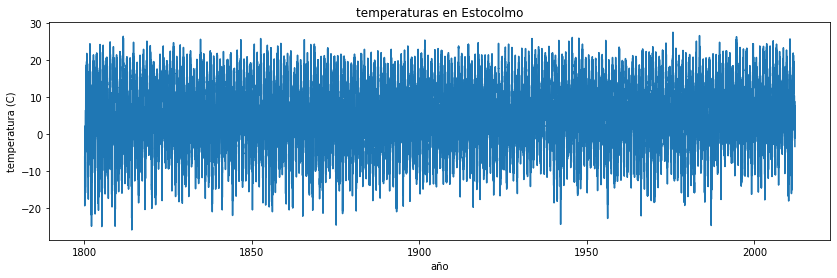

In [244]:
# Ejemplo de representación gráfica de los datos que veremos más tarde
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5]) # serie temporal
ax.axis('tight')
ax.set_title('temperaturas en Estocolmo')
ax.set_xlabel(u'año')  # u'' no hace falta con Python 3.x 
ax.set_ylabel('temperatura (C)');
# de momento estamos obteniendo este gráfico con las librería estándar Pyplot de Matplotlib 

In [245]:
import seaborn as sns     # aunque también podríamos usar una variante denominada Seaborn
# especialmente pensada para representar datos de tipo estadístico y de tratamiento de datos.

In [246]:
sns.set(style = 'darkgrid')

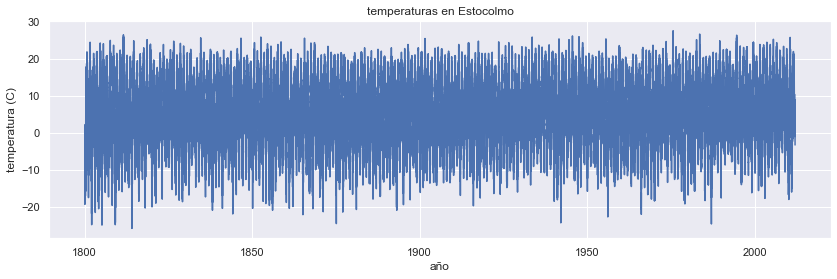

In [247]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5]) # serie temporal
ax.axis('tight')
ax.set_title('temperaturas en Estocolmo')
ax.set_xlabel(u'año')  # u'' no hace falta con Python 3.x 
ax.set_ylabel('temperatura (C)');

Usando `numpy.savetxt` podemos almacenar un array de Numpy en un fichero en formato CSV:

In [248]:
# %pwd

In [249]:
np.savetxt('datos.csv',data)

In [250]:
%ls *.csv

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8AEE-E6FD

 Directorio de C:\Users\Usuario\Downloads\NumPy\NumPy

16/10/2020  15:04        13.685.422 datos.csv
16/10/2020  01:49               102 matriz-aleatoria.csv
16/10/2020  15:04               132 matriz-aleatoria-bis.csv
09/10/2020  00:53                72 random-matrix.csv
               4 archivos     13.685.728 bytes
               0 dirs  282.583.928.832 bytes libres


A menudo puede resultar útil almacenar nuestros datos en arrays de Numpy, ya que este paquete proporciona numerosas funciones para realizar calculos estadísticos con conjuntos de datos en arrays. 

Por ejemplo, calculemos ciertas estadísticas del conjunto de datos usado anteriormente acerca de mediciones de temperatura en la ciudad de Estocolmo.

In [251]:
# recordemos que los datos de temperatura están almacenados 
# en la variable data:
np.shape(data)

(77431, 7)

In [252]:
data   # Nótese que sólo muestra una pequeña parte de los datos

array([[ 1.800e+03,  1.000e+00,  1.000e+00, ..., -6.100e+00, -6.100e+00,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  2.000e+00, ..., -1.540e+01, -1.540e+01,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  3.000e+00, ..., -1.500e+01, -1.500e+01,
         1.000e+00],
       ...,
       [ 2.011e+03,  1.200e+01,  2.900e+01, ...,  4.200e+00,  4.200e+00,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.000e+01, ..., -1.000e-01, -1.000e-01,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.100e+01, ..., -3.300e+00, -3.300e+00,
         1.000e+00]])

#### Media (`mean`)

In [254]:
# recordemos también que los datos sobre temperatura están en 
# la cuarta columna, asociada al índice 3
np.mean(data[:,3]), data[:,3].mean()

(6.197109684751585, 6.197109684751585)

Hemos obtenido pues que la temperatura media en Estocolmo durante los últimos  200 años ha sido cercana a los 6.2 C.

#### Desviación estándar ('standard deviation') y varianza ('variance')

In [255]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

In [256]:
data[:,3].std(), data[:,3].var()     # otra forma de obtener los mismos resultados anteriores

(8.282271621340573, 68.59602320966341)

#### Mínimos y máximos (`min` y `max`)

In [257]:
# temperatura media diaria más baja
data[:,3].min()

-25.8

In [258]:
# temperatura media diaria más alta
data[:,3].max()

28.3

### Cálculos sobre partes de un array

Usando el indexado adecuado (tal y cómo se ha visto anteriormente) también podemos realizar cálculos sobre sólo una parte de un array. Por ejemplo, volvamos al conjunto de datos sobre la temperatura:

In [259]:
# !head -n 3 stockholm_td_adj.dat
# comando válido sólo en sistemas Unix

El formato de los datos es: año, mes, día, temperatura media diaría, la más baja, la más alta, localización.

Si por ejemplo estamos interesados sólo en la temperatura media de un mes particular, digamos Febrero, entonces podríamos crear un índice máscara y usarlo para seleccionar sólo los datos de dicho mes:

In [260]:
# unique?  # Nótese que esta función devuelve un array con los valores 
# que toma otro determinado array, pero sin mostrar las repeticiones que
# pudiera haber.

In [261]:
np.unique(data[:,1]) # la columna mensual toma valores de 1 a 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [262]:
mask_feb = data[:,1] == 2

In [263]:
# los datos de temperatura están en la columna 3
data[mask_feb,3]

array([ 1.5,  0.5, -2.5, ...,  0.1, -2.2, -2.2])

In [264]:
len(data[mask_feb,3])

5987

In [265]:
np.mean(data[mask_feb,3])

-3.212109570736596

Con estas herramientas tenemos unas capacidades de procesamiento de datos muy potentes a nuestra disposición. Por ejemplo, extraer las temperaturas medias mensuales para cada mes del año sólo requeriría unas cuantas líneas de código:

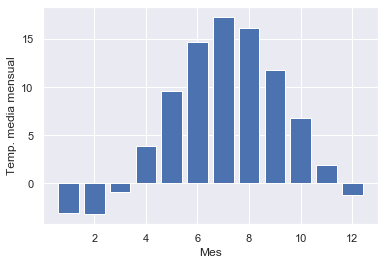

In [267]:
meses = np.arange(1,13)
media_mensual = [np.mean(data[data[:,1] == mes, 3]) for mes in meses]

fig, ax = plt.subplots()
ax.bar(meses, media_mensual)
ax.set_xlabel("Mes")
ax.set_ylabel("Temp. media mensual");

In [268]:
media_mensual

[-3.0447656725502132,
 -3.212109570736596,
 -0.8321515520389532,
 3.888474842767295,
 9.560970785149117,
 14.659591194968554,
 17.318837492391967,
 16.117650639074864,
 11.81937106918239,
 6.760057821059039,
 1.9458490566037738,
 -1.211275106512477]

## Lecturas adicionales 

* https://numpy.org/  - Página web oficial del proyecto.
* https://scipy.github.io/old-wiki/pages/Tentative_NumPy_Tutorial - Un primer tutorial.
* http://mathesaurus.sourceforge.net/matlab-numpy.html - Una guía de Numpy para usuarios de MATLAB.

## Versiones

In [269]:
%reload_ext version_information

%version_information numpy, matplotlib, seaborn

Software versions
Python 3.7.6 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.12.0
OS Windows 10 10.0.18362 SP0
numpy 1.18.1
matplotlib 3.1.3
seaborn 0.10.0
Fri Oct 16 15:05:54 2020 Hora de verano romance

In [270]:
%pwd

'C:\\Users\\Usuario\\Downloads\\NumPy\\NumPy'